In [6]:
# imports

import io
import os
import sys
import csv
import math
import json
import pprint

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.style as style
import matplotlib.font_manager as fm
import matplotlib.transforms as transforms

import pandas as pd
import numpy as np

In [7]:
#DATA PREPROCESSING

def read_log(filename, phase):

    phases = ['train', 'validate', 'test']
    assert phase in phases
    
    rows = []
    filename_no_extension = filename.split('.')[0]
    print(filename_no_extension)

    def isfloat(x):
        try:
            a = float(x)
        except ValueError:
            return False
        else:
            return True

    def isint(x):
        try:
            a = float(x)
            b = int(a)
        except ValueError:
            return False
        else:
            return a == b

    with open(filename, encoding='utf-8') as json_file:
        json_data = json.load(json_file)
        
        phase_key = phase + "Results"

        row_list = []
        keys = []
        log_list = json_data[phase_key]

        # Construct train array. 
        for i, stepdict in enumerate(log_list):
            row = []
            for key, val in stepdict.items():
                if i == 0:
                    keys.append(key)
                if isint(val):
                    row.append(int(val))
                elif isfloat(val):
                    row.append(float(val))
                else:
                    row.append(val)
            row_list.append(row) 

        print(keys)

        log_df = pd.DataFrame(row_list)
        log_df.columns = keys
        log_df['index'] = log_df.index
        log_df['index'] = log_df['index'].apply(lambda x: x*10)

    dfs = []

    # Handle distribution of columns in subplots. 
    column_split = [1,1,1,1,2,1]

    # Iterate over column split, and create a seperate DataFrame for 
    # each subplot. Add the subplot names to `ylabels`. 
    ylabel = ""
    ylabels = []
    for i,count in enumerate(column_split):
        key_list = ['index']
        if count == 1:
            ylabels.append(keys[i])
            key_list.append(keys[i])
            dfs.append(log_df[key_list])
        else:
            words = []
            for j in range(count):
                words.append(keys[i + j])
                words.append("/")
                key_list.append(keys[i + j])
            ylabels.append("".join(words[:-1]))
            dfs.append(log_df[key_list])
    print(ylabels)
    print(len(dfs))
    
    return dfs, ylabels

def create_subplot(ax, xaxis, yaxis, df, ylabel, column_total, color_index, NUM_COLORS):
    

    #===PLOT===
    graph = df.plot(x=xaxis, 
                    y=yaxis,
                    ax=ax, 
                    use_index=True)
                    #legend=True)
    # john
    plt.legend(loc='best')

    # hacks
    # ax.set_ylim(top=0.93, bottom=0.4)
    # ax.set_xlim(left=-0.1, right=10.5)

    MARKERS=['.',',','o','v','s','p','P','H','+','x','X','D','d','|','_','<','>','^','8','*','h','1','2','3','4']
    
    

    # distinct line colors/styles for many lines
    #LINE_STYLES = ['solid', 'dashed', 'dashdot', 'dotted']
    LINE_STYLES = ['solid']
    NUM_STYLES = len(LINE_STYLES)
    
    use_markers = False
    if use_markers:
        NUM_MARKERS = len(MARKERS)
        assert len(MARKERS) >= column_count
    cm = plt.get_cmap('magma') #'gist_rainbow'
    
    j = 0
    while color_index < column_total:
        plt.gca().get_lines()[j].set_color(cm(color_index//NUM_STYLES*float(NUM_STYLES)/NUM_COLORS))
        
        if use_markers:
            plt.gca().get_lines()[j].set_marker(MARKERS[j])
            # plt.gca().get_lines()[j].set_linestyle(LINE_STYLES[i%NUM_STYLES])
            plt.gca().get_lines()[j].set_markersize(7.0)
            
        plt.gca().get_lines()[j].set_linewidth(3.0)
        color_index += 1
        j += 1

    # add axis labels
    plt.xlabel(xlabel, 
               fontproperties=prop3, 
               fontsize = y_axis_label_size, 
               alpha=text_opacity)
    plt.ylabel(ylabel, 
               fontproperties=prop3, 
               fontsize = y_axis_label_size, 
               alpha=text_opacity)

    # change font of legend
    L = graph.legend(prop={'size': legend_size})
    plt.setp(L.texts, fontproperties=prop4, alpha=text_opacity)

    # set size of tick labels
    graph.tick_params(axis = 'both', 
                      which = 'major', 
                      labelsize = tick_label_size)

    # set fontname for tick labels
    for tick in graph.get_xticklabels():
        tick.set_fontname("DecimaMonoPro")
    for tick in graph.get_yticklabels():
        tick.set_fontname("DecimaMonoPro")

    # set color for tick labels
    [t.set_color('#303030') for t in ax.xaxis.get_ticklabels()]
    [t.set_color('#303030') for t in ax.yaxis.get_ticklabels()]

    # create bolded x-axis
    graph.axhline(y = 0, # 0
                  color = 'black', 
                  linewidth = 1.3, 
                  alpha = xaxis_opacity)
    
    return graph, color_index
    
filename = 'prelimSkipSlimGrowing.log'
dfs, ylabels = read_log(filename, 'train')

prelimSkipSlimGrowing
['epoch', 'iteration', 'time', 'loss', 'top1', 'top5', 'growthStep']
['epoch', 'iteration', 'time', 'loss', 'top1/top5', 'top5']
6


NameError: name 'column_counts' is not defined

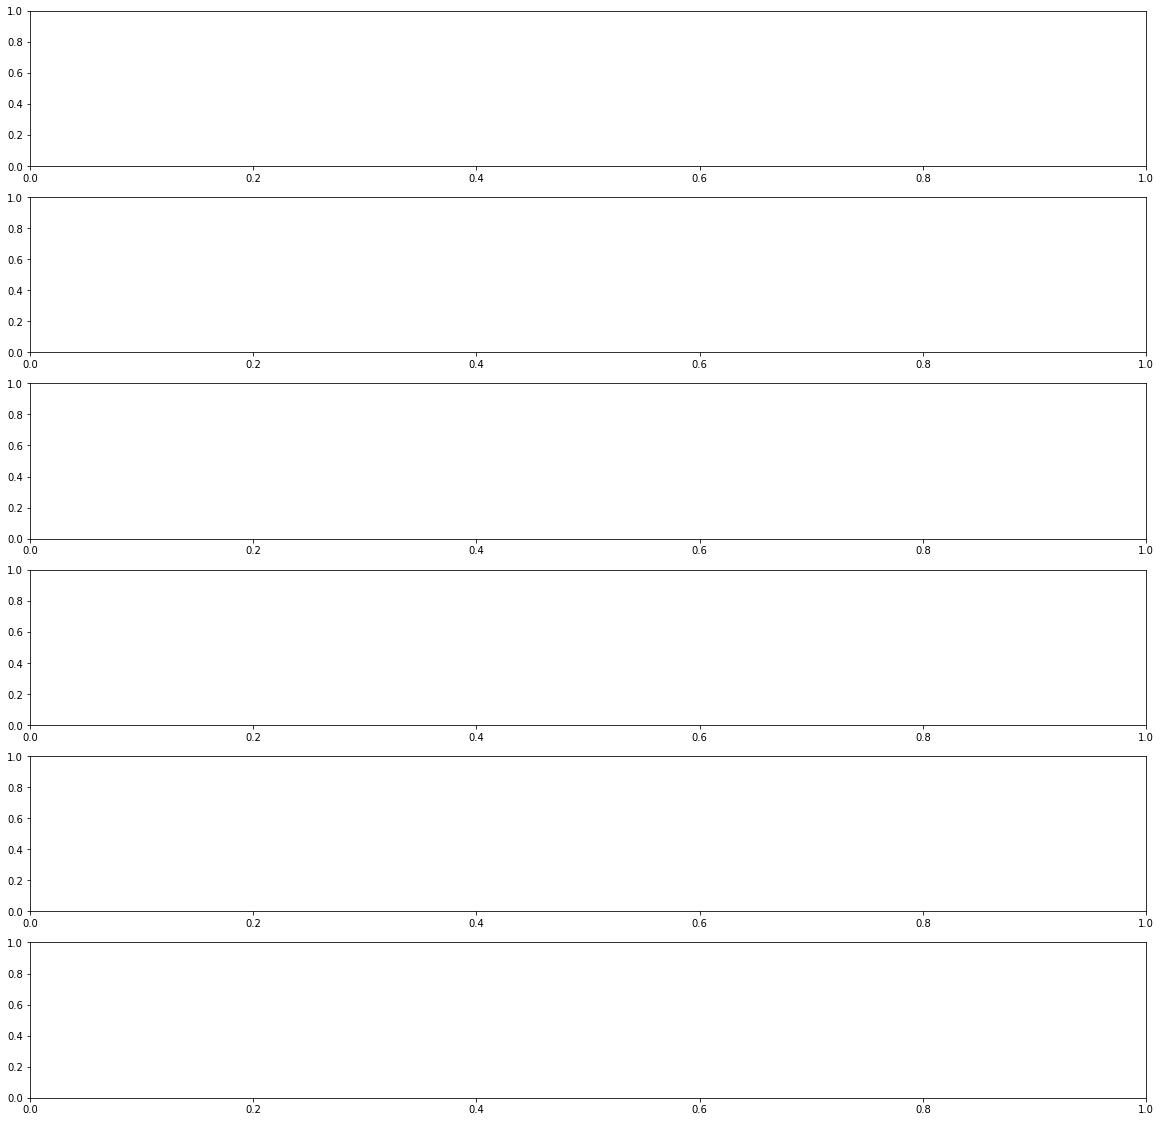

In [8]:
# PLOTTING

#================================================
# PARAMETERS
#================================================

# Size of ENTIRE PLOT. 
plot_height = 20 # 7.25
plot_width = 20
num_empty_ticks = 0

# x-axis.
xaxis = 'index'

# y-axis.
yaxis = None

# Text. 
title_text =  filename
subtitle_text = "train"
xlabel = ""
ylabel = "Loss"
banner_text = "©craw"

# Set edges of plot in figure (padding). 
top = 0.90
bottom = 0.1 #0.18 -- old
left = 0.08 # 0.1 -- old
right = 0.96

# Title sizes. 
title_pad_x = 0     # + is left, - is right
title_pos_y = 0.95
subtitle_pos_y = 0.92
title_fontsize = 50
subtitle_fontsize = 30

# Opacity.
text_opacity = 0.75
xaxis_opacity = 0.7

# Sizing.
tick_label_size = 14
legend_size = 14
y_axis_label_size = 14
x_axis_label_size = 24
banner_text_size = 14

# Import font. 
prop = fm.FontProperties(fname='DecimaMonoPro.ttf')
prop2 = fm.FontProperties(fname='apercu_medium_pro.otf')
prop3 = fm.FontProperties(fname='Apercu.ttf')
prop4 = fm.FontProperties(fname='Apercu.ttf', size=legend_size)

#ticks_font = matplotlib.font_manager.FontProperties(family='DecimaMonoPro', style='normal', size=12, weight='normal', stretch='normal')

#================================================
# END OF PARAMETERS
#================================================

def graph(dfs, ylabels, filename, column_counts, phase):
    
    # =========================================================

    # figure initialization
    fig, axlist = plt.subplots(figsize=(plot_width, plot_height),nrows=len(dfs))
    color_index = 0
    column_total = 0
    NUM_COLORS = sum(column_counts)

    for i, df in enumerate(dfs):
        ax = axlist[i]
        plt.sca(ax)
        style.use('fivethirtyeight')
        column_total += column_counts[i]
        graph, color_index = create_subplot(ax, xaxis, yaxis, df, ylabels[i], column_total, color_index, NUM_COLORS)



    xlabel = "Iterations"
    # add axis labels  
    plt.xlabel(xlabel, 
               fontproperties=prop3, 
               fontsize = 24, 
               alpha=text_opacity)

    # =========================================================

    # transforms the x axis to figure fractions, and leaves y axis in pixels
    xfig_trans = transforms.blended_transform_factory(fig.transFigure, transforms.IdentityTransform())
    yfig_trans = transforms.blended_transform_factory(transforms.IdentityTransform(), fig.transFigure)

    # banner positioning
    banner_y = math.ceil(banner_text_size * 0.6)

    # banner text
    banner = plt.annotate(banner_text, 
             xy=(0.02, banner_y*0.8), 
             xycoords=xfig_trans,
             fontsize = banner_text_size, 
             color = '#FFFFFF', 
             fontname='DecimaMonoPro')

    # banner background height parameters
    pad = 2 # points
    bb = ax.get_window_extent()
    h = bb.height/fig.dpi
    h = h * len(column_counts)
    height = ((banner.get_size()+2*pad)/72.)/h
    # height = 0.01

    # banner background
    rect = plt.Rectangle((0,0), 
                         width=1, 
                         height=height,
                         transform=fig.transFigure, 
                         zorder=3,
                         fill=True, 
                         facecolor="grey", 
                         clip_on=False)
    ax.add_patch(rect)

    #transform coordinate of left
    display_left_tuple = xfig_trans.transform((left,0))
    display_left = display_left_tuple[0]

    # shift title
    title_shift_x = math.floor(tick_label_size * 2.6)
    title_shift_x += title_pad_x

    # title
    graph.text(x = display_left - title_shift_x, y = title_pos_y, 
               transform = yfig_trans,
               s = title_text,
               fontproperties = prop2,
               weight = 'bold', 
               fontsize = title_fontsize,
               alpha = text_opacity)

    # subtitle, +1 accounts for font size difference in title and subtitle
    graph.text(x = display_left - title_shift_x + 1, y = subtitle_pos_y, 
               transform = yfig_trans,
               s = subtitle_text,
               fontproperties=prop3,
               fontsize = subtitle_fontsize, 
               alpha = text_opacity)


    # adjust position of subplot in figure
    plt.subplots_adjust(top=top)
    plt.subplots_adjust(bottom=bottom)
    plt.subplots_adjust(left=left)
    plt.subplots_adjust(right=right)

    # save to .svg
    plt.savefig(filename_no_extension + ".svg", dpi=300)
    
graph(dfs, ylabels, args.filename, column_counts, args.phase)s
graph()